In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn

In [2]:
from util.data_utils import get_SALICON_datasets

train_data, val_data, test_data = get_SALICON_datasets()

# train_file = 'train_datadict.pickle'
# val_file = 'val_datadict.pickle'
# test_file = 'test_datadict.pickle'

# train_data = get_SALICON_subset(train_file)
# val_data = get_SALICON_subset(val_file)
# train_data = get_SALICON_subset(train_file)

In [ ]:
from util.data_utils import OverfitSampler
from models.DSCLRCN_PyTorch2 import DSCLRCN
from util.solver import Solver

#num_train = 100
train_loader = torch.utils.data.DataLoader(train_data, batch_size=30, shuffle=True, num_workers=4)#,
                                           #sampler=OverfitSampler(num_train))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=30, shuffle=True, num_workers=4)

model = DSCLRCN(local_feats_net='CNN')
solver = Solver(optim_args={'lr': 1e-3})
solver.train(model, train_loader, val_loader, num_epochs=15, log_nth=50)

Loading weights for VGG16_CNN
Loading weights for PlacesCNN_VGG16
START TRAIN.
[Iteration 0/5010] TRAIN loss: 0.000100
[Iteration 50/5010] TRAIN loss: 0.000067
[Iteration 100/5010] TRAIN loss: 0.000053
[Iteration 150/5010] TRAIN loss: 0.000058
[Iteration 200/5010] TRAIN loss: 0.000047


In [3]:
from util.solver import Solver

#num_train = 100
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True, num_workers=4)#,
                                           #sampler=OverfitSampler(num_train))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True, num_workers=4)

# model = DSCLRCN(local_feats_net='CNN')
model = torch.load('new_model').cuda()

solver = Solver(optim_args={'lr': 1e-4})
solver.train(model, train_loader, val_loader, num_epochs=15, log_nth=50)

model.save('new_model2')

START TRAIN.
[Iteration 0/15000] TRAIN loss: 0.000036
[Iteration 50/15000] TRAIN loss: 0.000029
[Iteration 100/15000] TRAIN loss: 0.000032
[Iteration 150/15000] TRAIN loss: 0.000040
[Iteration 200/15000] TRAIN loss: 0.000029
[Iteration 250/15000] TRAIN loss: 0.000029
[Iteration 300/15000] TRAIN loss: 0.000030
[Iteration 350/15000] TRAIN loss: 0.000031
[Iteration 400/15000] TRAIN loss: 0.000033
[Iteration 450/15000] TRAIN loss: 0.000037
[Iteration 500/15000] TRAIN loss: 0.000032
[Iteration 550/15000] TRAIN loss: 0.000041
[Iteration 600/15000] TRAIN loss: 0.000031
[Iteration 650/15000] TRAIN loss: 0.000030
[Iteration 700/15000] TRAIN loss: 0.000029
[Iteration 750/15000] TRAIN loss: 0.000030
[Iteration 800/15000] TRAIN loss: 0.000027
[Iteration 850/15000] TRAIN loss: 0.000026
[Iteration 900/15000] TRAIN loss: 0.000030
[Iteration 950/15000] TRAIN loss: 0.000025
[Epoch 0/15] TRAIN KLD Loss: 0.000029
[Epoch 0/15] VAL KLD Loss: 0.000028
[Iteration 1000/15000] TRAIN loss: 0.000033
[Iteration 1

[Iteration 8650/15000] TRAIN loss: 0.000012
[Iteration 8700/15000] TRAIN loss: 0.000011
[Iteration 8750/15000] TRAIN loss: 0.000012
[Iteration 8800/15000] TRAIN loss: 0.000012
[Iteration 8850/15000] TRAIN loss: 0.000013
[Iteration 8900/15000] TRAIN loss: 0.000011
[Iteration 8950/15000] TRAIN loss: 0.000010
[Epoch 8/15] TRAIN KLD Loss: 0.000014
[Epoch 8/15] VAL KLD Loss: 0.000027
[Iteration 9000/15000] TRAIN loss: 0.000012
[Iteration 9050/15000] TRAIN loss: 0.000012
[Iteration 9100/15000] TRAIN loss: 0.000011
[Iteration 9150/15000] TRAIN loss: 0.000010
[Iteration 9200/15000] TRAIN loss: 0.000012
[Iteration 9250/15000] TRAIN loss: 0.000013
[Iteration 9300/15000] TRAIN loss: 0.000012
[Iteration 9350/15000] TRAIN loss: 0.000011
[Iteration 9400/15000] TRAIN loss: 0.000011
[Iteration 9450/15000] TRAIN loss: 0.000013
[Iteration 9500/15000] TRAIN loss: 0.000010
[Iteration 9550/15000] TRAIN loss: 0.000012
[Iteration 9600/15000] TRAIN loss: 0.000013
[Iteration 9650/15000] TRAIN loss: 0.000010
[I

In [4]:
model.save('new_model')

Saving model... new_model


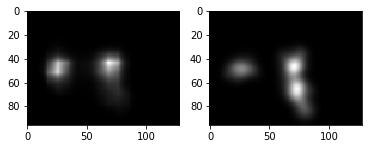

In [6]:
x,y = test_data.__getitem__(50)
x = x.contiguous().view(1, *x.size()).cuda()
y = y.numpy()
# model = torch.load('new_model').cuda()
# model.eval()
x_sal = model(Variable(x))

x_sal_nmp = x_sal.squeeze().cpu().data.numpy()
plt.subplot(1,2,1)
plt.imshow(x_sal_nmp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y, cmap='gray')
plt.show()

In [29]:
#X = np.random.randn(5, 3, 360, 480).astype(np.float32)
#X_tensor = torch.from_numpy(X.copy())
X_tensor = torch.rand(5, 3, 96, 128)
inputs = Variable(X_tensor)
tsum = torch.sum(X_tensor, dim=3)
tsum = tsum.view(*tsum.size(),1).expand_as(X_tensor)
X_tensor /= tsum

In [3]:
from models.DSCLRCN_PyTorch import DSCLRCN

full_model = DSCLRCN()
#full_model = full_model.cuda()
outputs = full_model(inputs)
outputs = outputs.squeeze()
outputs.size()

Loading weights for VGG16_CNN
Loading weights for PlacesCNN_VGG16


torch.Size([5, 96, 128])

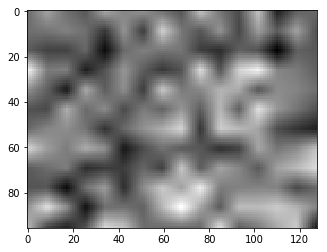

Variable containing:
 1.0000
[torch.FloatTensor of size 1]

In [4]:
import matplotlib.pyplot as plt

x = outputs.data.numpy()
plt.imshow(x[4,:,:],cmap='gray')
plt.show()

torch.sum(outputs[2,:,:].view(96*128))

In [3]:
from models.segmentation_resnet50.segmentation_nn import SegmentationNN

seg_model = SegmentationNN()
outputs = seg_model(inputs)
outputs.size()

Loading weights for net_encoder
torch.Size([5, 2048, 12, 16])


torch.Size([5, 256, 12, 16])

In [4]:
from models.cnn_vgg16.local_cnn import LocalFeatsCNN

LocalFeats_model = LocalFeatsCNN()
outputs = LocalFeats_model(inputs)
outputs.size()

Loading weights for VGG16_CNN


torch.Size([5, 256, 12, 16])

In [16]:
X_tensor = torch.rand(5, 3, 6, 10)
inputs = Variable(X_tensor)
deconv = nn.ConvTranspose2d(3, 16, 7)
deconv(inputs).size()

torch.Size([5, 16, 12, 16])

In [5]:
from models.places_vgg16.places_cnn import PlacesCNN

places_model = PlacesCNN()
outputs = places_model(inputs)
outputs.size()

Loading weights for PlacesCNN_VGG16
torch.Size([5, 512, 3, 4])


torch.Size([5, 256])

In [32]:
vgg16_complete = torchvision.models.vgg16(pretrained=False)
pretrained_dict = vgg16_complete.features.state_dict()

pretrained_dict.update(vgg2)

In [7]:
inputs[:,:,:,].size()

torch.Size([3, 3, 360, 480])

In [26]:
ss = vgg16_complete.state_dict()
for k,v in ss.items():
    print(k)

features.0.weight
features.0.bias
features.2.weight
features.2.bias
features.5.weight
features.5.bias
features.7.weight
features.7.bias
features.10.weight
features.10.bias
features.12.weight
features.12.bias
features.14.weight
features.14.bias
features.17.weight
features.17.bias
features.19.weight
features.19.bias
features.21.weight
features.21.bias
features.24.weight
features.24.bias
features.26.weight
features.26.bias
features.28.weight
features.28.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


In [9]:
inputs.resize(3,3,20,20).size()

RuntimeError: requested resize to 3x3x20x20 (3600 elements in total), but the given tensor has a size of 3x3x360x480 (1555200 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 

In [5]:
conv_test = nn.Conv2d(2048, 512, kernel_size=(7, 5), stride=(3, 2), padding=(2, 2))

X = np.random.randn(3, 2048, 45, 60).astype(np.float32)
X_tensor = torch.from_numpy(X.copy())
inputs = Variable(X_tensor)

y = conv_test(inputs)
y.size()

torch.Size([3, 512, 15, 30])

In [4]:
X = np.random.randn(3, 3, 360, 480).astype(np.float32)
X_tensor = torch.from_numpy(X.copy())
inputs = Variable(X_tensor)

In [6]:
nn.Softmax2d?

In [11]:
torch.rand?